<a href="https://colab.research.google.com/github/fachiny17/machine_learning/blob/main/tensorflow_course/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Network and Computer Vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data
The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza and steak) using the image data modification notebok: ...

>**Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall ()
zip_ref.close()

--2025-07-23 16:25:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 172.253.118.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.2MB/s    in 5.7s    

2025-07-23 16:25:16 (18.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one wth the data.
AAnd for a computer vision project... this usually means visualizing many samples of your data.

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/test/

pizza  steak


In [6]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [7]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [8]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jul 23 16:25 .
drwxr-xr-x 1 root root 4096 Jul 23 16:25 ..
drwxr-xr-x 4 root root 4096 Jul 23 16:25 test
drwxr-xr-x 4 root root 4096 Jul 23 16:25 train


In [9]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get class names programmatically

In [10]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [11]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the targe directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


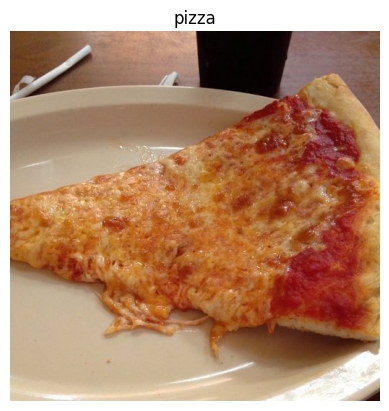

In [12]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [13]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[105,  60,  31],
        [107,  62,  33],
        [106,  62,  33],
        ...,
        [127,  85,  60],
        [128,  84,  57],
        [127,  83,  56]],

       [[104,  59,  30],
        [106,  61,  32],
        [106,  62,  33],
        ...,
        [126,  84,  59],
        [128,  84,  59],
        [127,  83,  56]],

       [[102,  58,  29],
        [105,  61,  32],
        [106,  63,  31],
        ...,
        [126,  86,  61],
        [127,  85,  61],
        [126,  84,  59]],

       ...,

       [[226, 206, 173],
        [223, 203, 170],
        [221, 201, 168],
        ...,
        [ 40,  10,   8],
        [ 39,   9,   7],
        [ 39,   9,   7]],

       [[230, 210, 177],
        [226, 206, 173],
        [225, 205, 172],
        ...,
        [ 40,  10,   8],
        [ 42,  12,  10],
        [ 43,  13,  11]],

       [[232, 212, 179],
        [229, 209, 176],
        [228, 208, 175],
        ...,
        [ 40,  10,   

In [14]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

In [15]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.41176471, 0.23529412, 0.12156863],
        [0.41960784, 0.24313725, 0.12941176],
        [0.41568627, 0.24313725, 0.12941176],
        ...,
        [0.49803922, 0.33333333, 0.23529412],
        [0.50196078, 0.32941176, 0.22352941],
        [0.49803922, 0.3254902 , 0.21960784]],

       [[0.40784314, 0.23137255, 0.11764706],
        [0.41568627, 0.23921569, 0.1254902 ],
        [0.41568627, 0.24313725, 0.12941176],
        ...,
        [0.49411765, 0.32941176, 0.23137255],
        [0.50196078, 0.32941176, 0.23137255],
        [0.49803922, 0.3254902 , 0.21960784]],

       [[0.4       , 0.22745098, 0.11372549],
        [0.41176471, 0.23921569, 0.1254902 ],
        [0.41568627, 0.24705882, 0.12156863],
        ...,
        [0.49411765, 0.3372549 , 0.23921569],
        [0.49803922, 0.33333333, 0.23921569],
        [0.49411765, 0.32941176, 0.23137255]],

       ...,

       [[0.88627451, 0.80784314, 0.67843137],
        [0.8745098 , 0.79607843, 0.66666667],
        [0.86666667, 0

## An end-to-end example
Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our taining data

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called scaling  or normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directoies
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [18]:
# Build a CNN model (same as the Tiny VGG in the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 201ms/step - accuracy: 0.6761 - loss: 0.6363 - val_accuracy: 0.7800 - val_loss: 0.4511
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - accuracy: 0.7836 - loss: 0.4635 - val_accuracy: 0.7780 - val_loss: 0.4478
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.8014 - loss: 0.4070 - val_accuracy: 0.8440 - val_loss: 0.3792
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.8544 - loss: 0.3810 - val_accuracy: 0.7980 - val_loss: 0.4045
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.8524 - loss: 0.3378 - val_accuracy: 0.8580 - val_loss: 0.3290


In [19]:
# Our model's summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using the same model as before
Let's replicate the model we've built in a previous section to see if it woks with our image data.
The model we're building is from the [TensorFLow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.24887&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [20]:
train_data

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - accuracy: 0.4960 - loss: 3.6562 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.5084 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.4861 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.5269 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.5156 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932


In [22]:
# summary of model_2
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly...let's try to improve it.

In [23]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.5769 - loss: 5.3848 - val_accuracy: 0.7300 - val_loss: 0.6397
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.6882 - loss: 0.8445 - val_accuracy: 0.7520 - val_loss: 0.5925
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.7797 - loss: 0.4907 - val_accuracy: 0.7300 - val_loss: 0.5513
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.7574 - loss: 0.5229 - val_accuracy: 0.6880 - val_loss: 0.6681
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.7363 - loss: 0.7120 - val_accuracy: 0.7720 - val_loss: 0.4664


In [24]:
# model_3 summary
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## Binary Classification: Let's break it down

### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 384, 3)


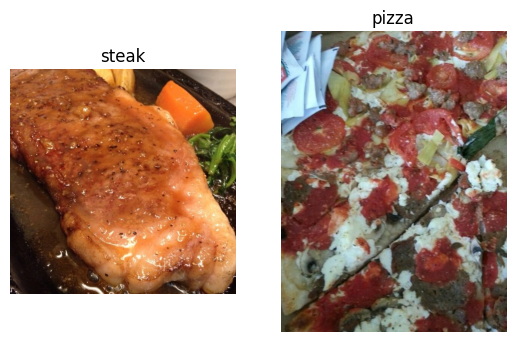

In [25]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


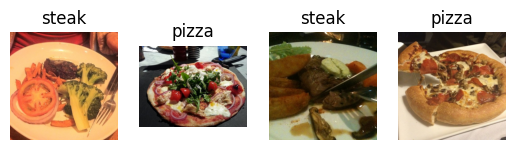

In [26]:
# Visualize data
plt.figure()
plt.subplot(1,4,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 4, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

plt.subplot(1,4,3)
steak_img1 = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 4, 4)
pizza_img1 = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it fot the model)

In [27]:
# Define the directory dataset path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [28]:
!nvidia-smi

Wed Jul 23 16:27:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P0             31W /   70W |    1690MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [29]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [30]:
# Load in our image data from directories and turn them into batches
tain_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224), # Target size of images (height, width)
                                              class_mode="binary", # type of data you're working with
                                              batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224, 224),
                                            class_mode="binary",
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [31]:
# Get a sample of a train data batch
images, labels = next(train_data) # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [32]:
# How many batches are there
len(train_data)

47

In [33]:
1500/32

46.875

In [34]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.03137255, 0.03529412, 0.01568628],
          [0.03529412, 0.03921569, 0.01960784],
          [0.03137255, 0.03529412, 0.01568628],
          ...,
          [0.0509804 , 0.05882353, 0.10588236],
          [0.05882353, 0.0627451 , 0.07843138],
          [0.05490196, 0.0627451 , 0.05882353]],
 
         [[0.03529412, 0.03921569, 0.01960784],
          [0.02745098, 0.03137255, 0.01176471],
          [0.02745098, 0.03137255, 0.01176471],
          ...,
          [0.0509804 , 0.05882353, 0.10588236],
          [0.05882353, 0.0627451 , 0.08235294],
          [0.04705883, 0.0509804 , 0.05882353]],
 
         [[0.03529412, 0.03921569, 0.01960784],
          [0.02745098, 0.03137255, 0.01176471],
          [0.02745098, 0.03137255, 0.01176471],
          ...,
          [0.0509804 , 0.05882353, 0.10980393],
          [0.06666667, 0.06666667, 0.10588236],
          [0.04705883, 0.0509804 , 0.07058824]],
 
         ...,
 
         [[0.40000004, 0.36078432, 0.3137255 ],
          [0.28627

### 3. Ceate a CNN model (start with a baseline)

In [35]:
# Make the creating of our model a little easie
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [36]:
# Create the model (this will be our baseline)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only one(1) output neuron)
])

In [37]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [38]:
# summay of model_4
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

### 4. Fit the model

In [39]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [40]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - accuracy: 0.5379 - loss: 4.5097 - val_accuracy: 0.6800 - val_loss: 0.5648
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.7436 - loss: 0.5251 - val_accuracy: 0.7920 - val_loss: 0.4413
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.8706 - loss: 0.3298 - val_accuracy: 0.8060 - val_loss: 0.4375
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.9369 - loss: 0.2191 - val_accuracy: 0.8460 - val_loss: 0.3736
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.9806 - loss: 0.0941 - val_accuracy: 0.8220 - val_loss: 0.4155


### 5. Evaluating our model

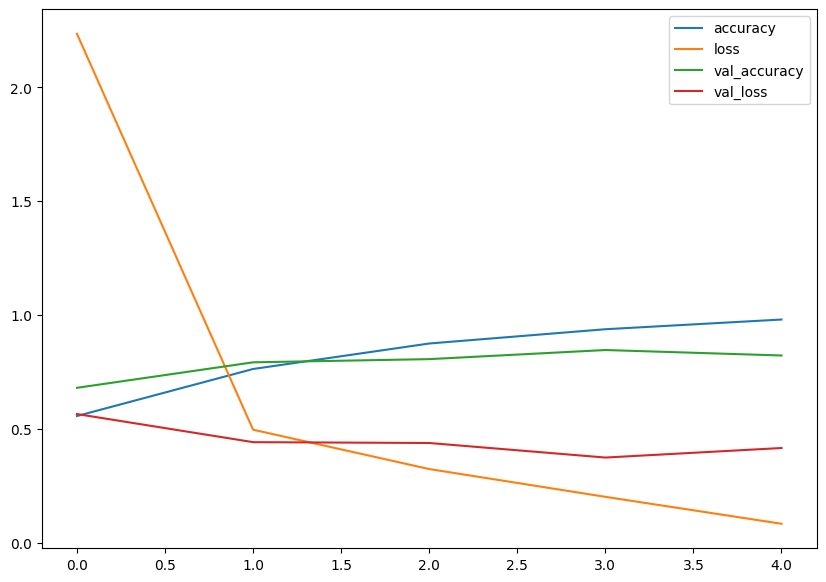

In [41]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [42]:
# Plot the validation and training cuves separately
def plot_loss_curves(history):
  """
  Returns separate loss cuves for training and validation metrics.
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

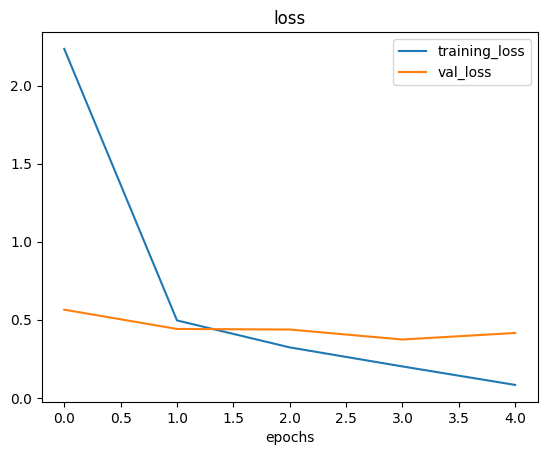

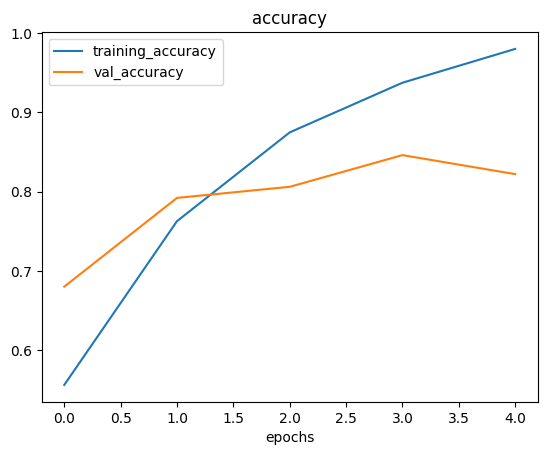

In [43]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters
Fiiting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the bseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increse the number of conv layers
* Increase the number of conv filters
* Add another layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

In [44]:
# Create the model (this is going to be our baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu",input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [46]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - accuracy: 0.5890 - loss: 0.6544 - val_accuracy: 0.7980 - val_loss: 0.4538
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.7878 - loss: 0.4584 - val_accuracy: 0.8580 - val_loss: 0.3516
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.8389 - loss: 0.3861 - val_accuracy: 0.8660 - val_loss: 0.3278
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.8484 - loss: 0.3718 - val_accuracy: 0.8940 - val_loss: 0.3007
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.8348 - loss: 0.3465 - val_accuracy: 0.8960 - val_loss: 0.2917


In [47]:
# summary of model_5
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

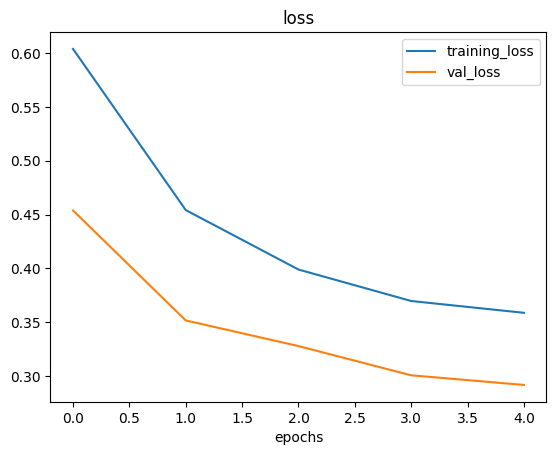

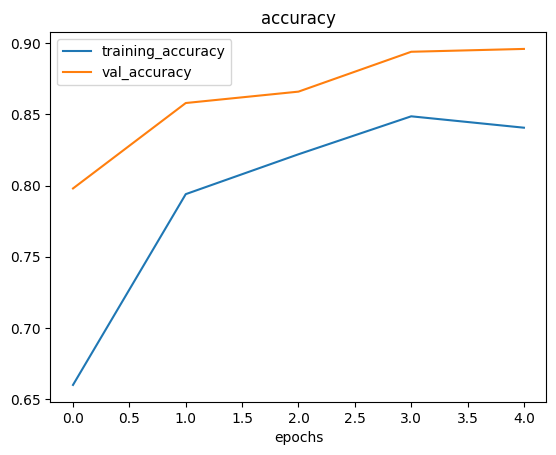

In [48]:
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [49]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                         rotation_range=0.2,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.3,
                                         horizontal_flip=True)

# Ceate ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Data augmentation:** is the process of altering our training data, leading it to have more diversity and in turn allowing
our models to learn more generalizable (hopefully) patterns.

In [50]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


>**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data
augmentation parameters our images are left as they are in the directories but are modified as they're loaded in the model.

Finnally... let's visualize some augmented data!!!

In [51]:
# Get sample data batches
images, labels = train_data_augmented.__next__()
augmented_images, augmented_labels = train_data_augmented.__next__() # note labels aren't augmented.. only data(images)

showing image number: 1


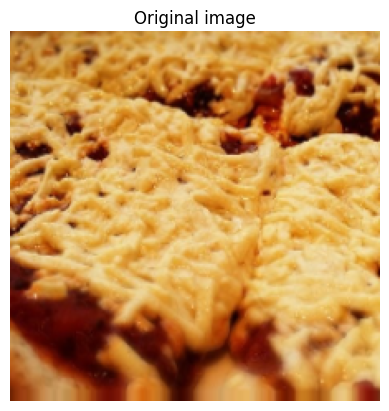

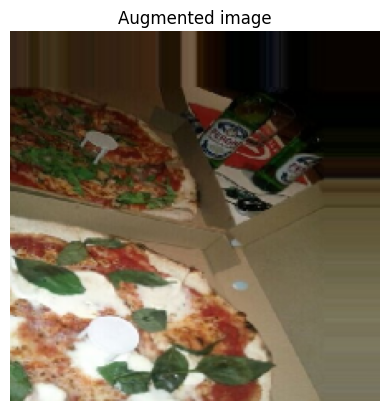

In [52]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [53]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 446ms/step - accuracy: 0.4530 - loss: 0.7307 - val_accuracy: 0.6540 - val_loss: 0.6860
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 431ms/step - accuracy: 0.5260 - loss: 0.6906 - val_accuracy: 0.5040 - val_loss: 0.6778
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 410ms/step - accuracy: 0.4569 - loss: 0.7054 - val_accuracy: 0.6820 - val_loss: 0.6741
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 425ms/step - accuracy: 0.5804 - loss: 0.6953 - val_accuracy: 0.5400 - val_loss: 0.6610
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 432ms/step - accuracy: 0.5698 - loss: 0.6830 - val_accuracy: 0.5880 - val_loss: 0.6920


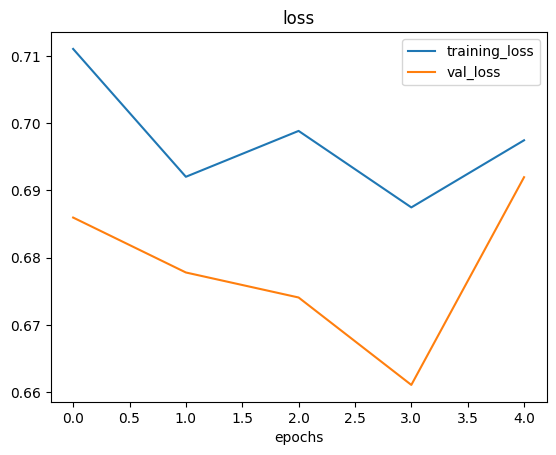

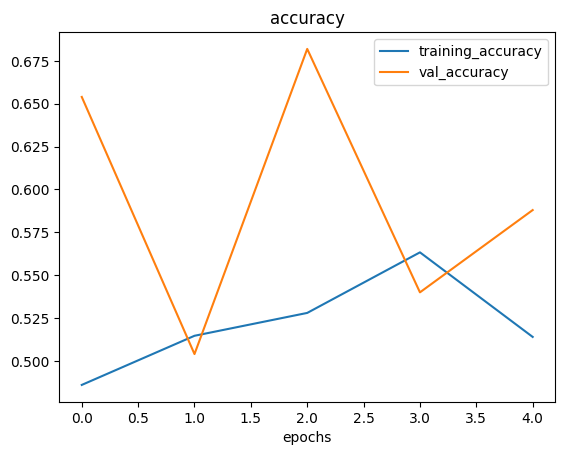

In [54]:
# Check our model's training curve
plot_loss_curves(history_6)

Let's shuffle augmented training data and train another model (the same as before) on it and see what happens.

In [55]:
# Import data and augment it and shuffle from training directory

train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data..

Found 1500 images belonging to 2 classes.


In [56]:
# Create the model (same as model_5 and 6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
    ])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 444ms/step - accuracy: 0.5697 - loss: 0.6802 - val_accuracy: 0.7920 - val_loss: 0.5400
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 407ms/step - accuracy: 0.7468 - loss: 0.5642 - val_accuracy: 0.8200 - val_loss: 0.4366
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 427ms/step - accuracy: 0.7402 - loss: 0.5215 - val_accuracy: 0.8480 - val_loss: 0.3512
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 434ms/step - accuracy: 0.7733 - loss: 0.5029 - val_accuracy: 0.8400 - val_loss: 0.3676
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 406ms/step - accuracy: 0.7864 - loss: 0.4924 - val_accuracy: 0.8500 - val_loss: 0.3332


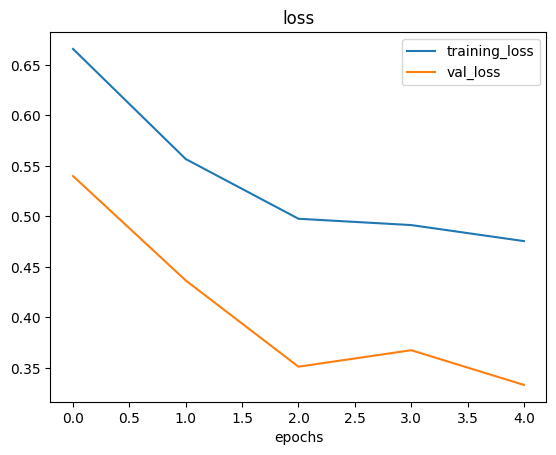

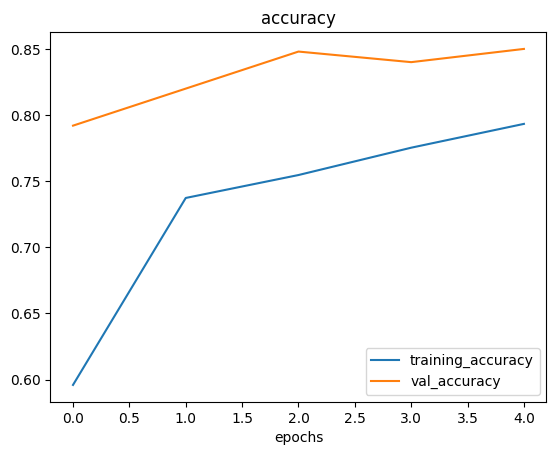

In [57]:
 # plot loss cuves
 plot_loss_curves(history_7)

### 7. Repeat until satisfied

## Making a prediction with our trained model on our own custom data

In [58]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2025-07-23 16:32:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2025-07-23 16:32:11 (165 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



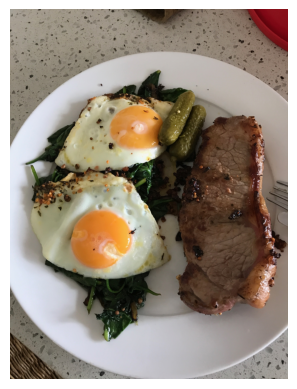

In [59]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [60]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [61]:
# Create a function to import an image and resize it to be able to be used with or ..
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshape it to (img_shape, img_shape, colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  #Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #Rescale the image (get all values between 0 and 1)
  img = img/225.
  return img

In [62]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7227778 , 0.705     , 0.6561111 ],
        [0.7372222 , 0.7161111 , 0.66833335],
        [0.7161111 , 0.6894444 , 0.63611114],
        ...,
        [0.5911111 , 0.05777778, 0.10222222],
        [0.5611111 , 0.04777778, 0.08      ],
        [0.5988889 , 0.08777778, 0.11888889]],

       [[0.75      , 0.7322222 , 0.69222224],
        [0.7238889 , 0.70611113, 0.6527778 ],
        [0.74333334, 0.71666664, 0.66333336],
        ...,
        [0.6066667 , 0.07777778, 0.10444444],
        [0.60055554, 0.06722222, 0.10722222],
        [0.5827778 , 0.06277778, 0.09833334]],

       [[0.73888886, 0.7211111 , 0.6677778 ],
        [0.72444445, 0.69555557, 0.6433333 ],
        [0.7438889 , 0.71055555, 0.66055554],
        ...,
        [0.6022222 , 0.07333333, 0.09111111],
        [0.5977778 , 0.07777778, 0.11333334],
        [0.5922222 , 0.05888889, 0.09888889]],

       ...,

       [[0.5588889 , 0.48444444, 0.35166666],
        [0.06

In [63]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


array([[0.81640446]], dtype=float32)

In [64]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [65]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

np.str_('steak')

In [66]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with the model and plots
  the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


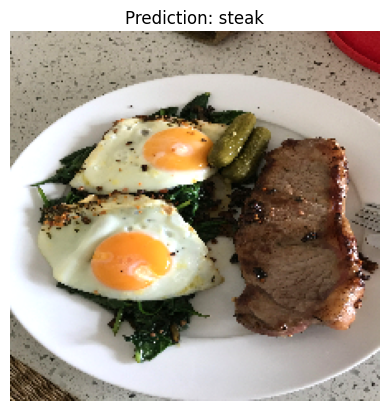

In [67]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

--2025-07-23 16:32:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2025-07-23 16:32:15 (199 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


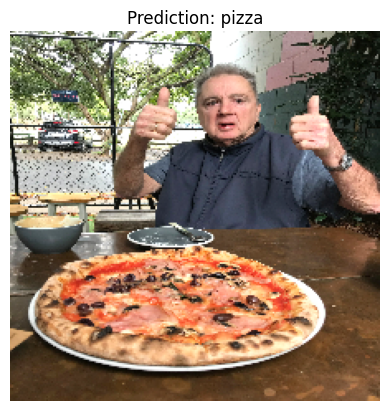

In [68]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [71]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-07-23 16:44:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 142.250.4.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M  22.2MB/s    in 24s     

2025-07-23 16:44:26 (20.6 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [73]:
import os

# Walkthrough 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}'.")

There are 2 directories and 0 images in 10_food_classes_all_data'.
There are 10 directories and 0 images in 10_food_classes_all_data/train'.
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry'.
There are 1

In [74]:
# Setup the train and test dirctories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [76]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (306, 512, 3)


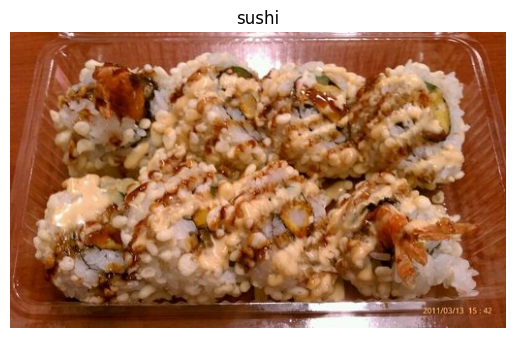

In [87]:
# Visualize
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
